In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast
import subprocess
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import rdFMCS
from IPython.display import display
import xml.etree.ElementTree as ET
import os
import subprocess
os.chdir('/Users/kate_fieseler/PycharmProjects/chemUtils') # Need to add this package to the path
import chemUtils
from chemUtils import *
from chemUtils.visualization.molPlot import draw_molecule_grid_with_captions
from utils.input import process_routes
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23')
from rdkit.Chem.rdfiltercatalog import FilterCatalog, FilterCatalogParams


In [50]:
# 1. Load the data, look, and convert to RDKit molecules. 6 molecules total.
df = pd.read_csv('20Aug_Dani_Warren_Yes_Green.csv')
df

,target,Rank_within_target,Enumerate,vendor_id,Reference,USD,Company,Lead time,hit_names,smiles,name
0,D2R,5,Yes,CSSB00016993477,BAZAGILZMWLCGG-UHFFFAOYSA-N,19,aablocks /enamine ltd,3 days,x0592-0B-x0292-2B,C(NC1=CC=C(S(NC=2SC=CN2)(=O)=O)C=C1)(=O)CC=3C4...,BAZAGILZMWLCGG-UHFFFAOYSA-N-x0592-0B-x0292-2B
1,D2R,12,Yes,CSSS00160384825,Z1171626642,61,chembridge us,15 days,x0252-2B-x0485-0A,CC(=O)NC1=CC(NC(C)=O)=CC(C(=O)NCC2=NC(C3=CC=CC...,Z1171626642-x0252-2B-x0485-0A
2,Ric8inhibitor,1,Yes,MCULE-8704052377,CSCS00046170810,95,mcule,22 days,x0119-2B-x0311-1A,CN(C)S(=O)(=O)C1=CC(C(=O)NC2=CC=C(F)C=C2)=C(C)O1,CSCS00046170810-x0119-2B-x0311-1A
3,Ric8enhancer,3,Yes,Z295447456,CSSB00132381984,82,enamine ltd,NaN,x0125-0A-x0580-0A,O=S(=O)(NC1=CC=C(OC2=CC=CC=C2)C=C1)C3=CC=CC4=C...,CSSB00132381984-x0125-0A-x0580-0A
4,Ric8enhancer,4,Yes,MCULE-3701944779,Z1260603230,39,mcule,17 days,x0125-0A-x0500-0A,O=S(=O)(NC1=CC=C(COCC2=CC=CC=C2)C=C1)C3=CC=CC4...,Z1260603230-x0125-0A-x0500-0A
5,Ric8enhancer,7,Yes,CSSB00159245657,CSSB00015189076,97,aa blocks us,7 days,x0128-0B-x0125-0B,CCCCCN1C=C(C(=O)NC2=CC=CC3=CC=CC=C23)C4=CC=CC=C14,CSSB00015189076-x0128-0B-x0125-0B
6,CB1R,5,Yes,MCULE-7154656852,CSSB03437012178,65,mcule,27 days,x0119-0B-x0128-0B,CN(C)C(CNC(=O)C1=CC=CC(=C1)C#N)C2=CC3=CC=CC=C3O2,CSSB03437012178-x0119-0B-x0128-0B


In [51]:
# Save csv of smiles
df['smiles'].to_csv('20Aug_Dani_Warren_Yes_Green_smiles.csv', index=False)

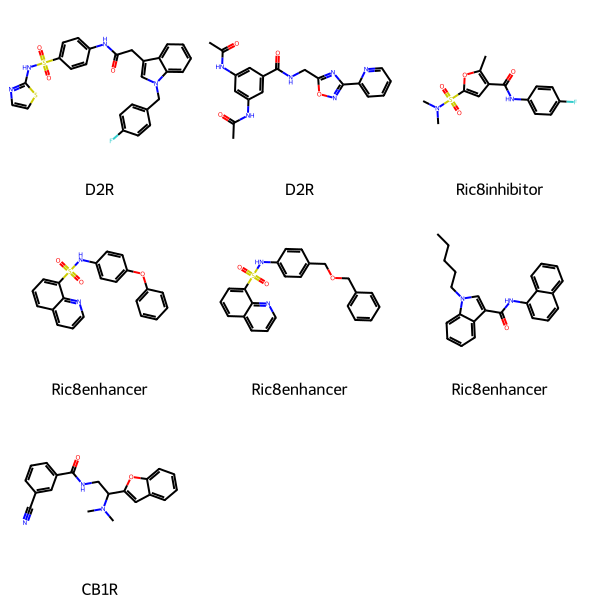

In [52]:
# 2. Visualize
draw_molecule_grid_with_captions(df['smiles'].tolist(), df['target'].tolist())

In [53]:
# 3. Get reactants
# Use only diamond reactions = True
# Run through retrosynthesis Manifold
# search depth = 4
# catalogs = ["mcule_ultimate", "generic", "molport", "mcule", "enamine_bb"]
# cache_fname_tags='NCS1_Warren_Priority_23Aug'
command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/20Aug_Dani_Warren_Yes_Green_smiles.csv",
    "0"
]
subprocess.run(command)

tmpdir: <TemporaryDirectory '/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpj31oz073'>
cache_working_name: /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpj31oz073/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite
Number of entries in cache: 7
---PRE SEARCH---
(1, 1, 1, 1, 1, 1, 2)
saving cache /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpj31oz073/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite /Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite


100%|██████████| 7/7 [00:00<00:00, 818.99it/s]


CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/20Aug_Dani_Warren_Yes_Green_smiles.csv', '0'], returncode=0)

In [54]:
# Get single step pathways
command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py",
    "-t",
    "/Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite", # cache to look through
    "-r",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23", # results
    "-s",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/20Aug_Dani_Warren_Yes_Green_smiles_last.csv", #smiles csv
    "-x", # retrosynthesis
    "-n", # number of steps looking for
    "1"
]
subprocess.run(command)
# No error code so all smiles were found

Cache path provided: /Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite
Results directory provided: /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23
---Performing retrosynthesis search---
Number of steps you are looking for: 1
Saving all routes with 1 step(s) to csv at 20Aug_Dani_Warren_Yes_Green_smiles_last_routes_1_step.csv


CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py', '-t', '/Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite', '-r', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23', '-s', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/20Aug_Dani_Warren_Yes_Green_smiles_last.csv', '-x', '-n', '1'], returncode=0)

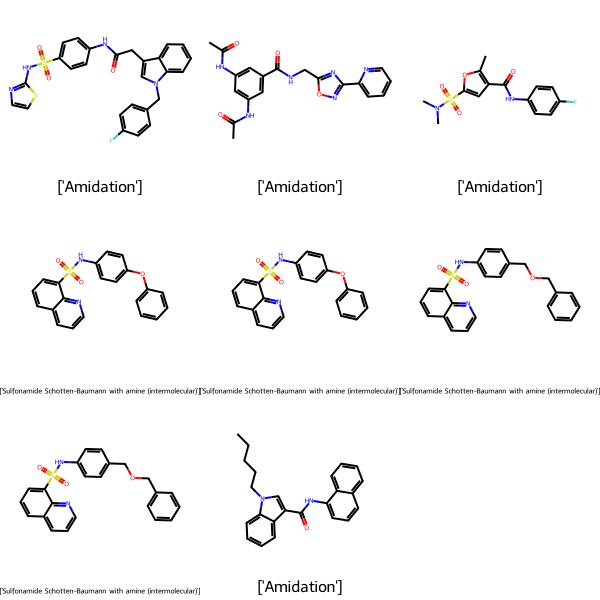

In [55]:
df2 = pd.read_csv('20Aug_Dani_Warren_Yes_Green_smiles_routes_1_step.csv')
draw_molecule_grid_with_captions(df2['SMILES'].tolist(), df2['rxn_order_first_to_last'].tolist())

THE LAST CBR1 COMPOUND WE CANNOT MAKE. 

In [56]:
# Look at all compounds and reactants in mol grid
df = pd.read_csv('20Aug_Dani_Warren_Yes_Green_smiles_routes_1_step.csv')
df

,SMILES,num_steps,rxn_order_first_to_last,reactants,BuildingBlocks,catalogName_for_BuildingBlock
0,C(NC1=CC=C(S(NC=2SC=CN2)(=O)=O)C=C1)(=O)CC=3C4...,1,['Amidation'],"[('O=C(O)Cc1cn(Cc2ccc(F)cc2)c2ccccc12', 'Nc1cc...",['O=C(Cc1cn(Cc2ccc(F)cc2)c2ccccc12)Nc1ccc(S(=O...,"['mcule_ultimate', 'enamine_bb', 'mcule', 'mol..."
1,CC(=O)NC1=CC(NC(C)=O)=CC(C(=O)NCC2=NC(C3=CC=CC...,1,['Amidation'],"[('NCc1nc(-c2ccccn2)no1', 'CC(=O)Nc1cc(NC(C)=O...","['CC(=O)Nc1cc(NC(C)=O)cc(C(=O)O)c1', None, 'NC...","['molport', 'mcule', 'enamine_bb', 'mcule', 'e..."
2,CN(C)S(=O)(=O)C1=CC(C(=O)NC2=CC=C(F)C=C2)=C(C)O1,1,['Amidation'],"[('Nc1ccc(F)cc1', 'Cc1oc(S(=O)(=O)N(C)C)cc1C(=...","['Nc1ccc(F)cc1', 'Cc1oc(S(=O)(=O)N(C)C)cc1C(=O...","['enamine_bb', 'mcule', 'molport', 'generic', ..."
3,O=S(=O)(NC1=CC=C(OC2=CC=CC=C2)C=C1)C3=CC=CC4=C...,1,['Sulfonamide Schotten-Baumann with amine (int...,"[('O=S(=O)(Cl)c1cccc2cccnc12', 'Nc1ccc(Oc2cccc...","['O=S(=O)(Cl)c1cccc2cccnc12', 'Nc1ccc(Oc2ccccc...","['enamine_bb', 'mcule', 'generic', 'molport', ..."
4,O=S(=O)(NC1=CC=C(OC2=CC=CC=C2)C=C1)C3=CC=CC4=C...,1,['Sulfonamide Schotten-Baumann with amine (int...,"[('O=S(=O)(F)c1cccc2cccnc12', 'Nc1ccc(Oc2ccccc...","['O=S(=O)(F)c1cccc2cccnc12', 'O=S(=O)(Nc1ccc(O...","['mcule', 'molport', 'mcule', 'mcule_ultimate'..."
5,O=S(=O)(NC1=CC=C(COCC2=CC=CC=C2)C=C1)C3=CC=CC4...,1,['Sulfonamide Schotten-Baumann with amine (int...,"[('O=S(=O)(Cl)c1cccc2cccnc12', 'Nc1ccc(COCc2cc...","['O=S(=O)(Cl)c1cccc2cccnc12', None, 'Nc1ccc(CO...","['molport', 'generic', 'enamine_bb', 'mcule', ..."
6,O=S(=O)(NC1=CC=C(COCC2=CC=CC=C2)C=C1)C3=CC=CC4...,1,['Sulfonamide Schotten-Baumann with amine (int...,"[('O=S(=O)(F)c1cccc2cccnc12', 'Nc1ccc(COCc2ccc...","[None, 'Nc1ccc(COCc2ccccc2)cc1', 'O=S(=O)(F)c1...","['enamine_bb', 'mcule', 'mcule']"
7,CCCCCN1C=C(C(=O)NC2=CC=CC3=CC=CC=C23)C4=CC=CC=C14,1,['Amidation'],"[('Nc1cccc2ccccc12', 'CCCCCn1cc(C(=O)O)c2ccccc...","['CCCCCn1cc(C(=O)Nc2cccc3ccccc23)c2ccccc21', '...","['mcule', 'generic', 'enamine_bb', 'mcule', 'm..."


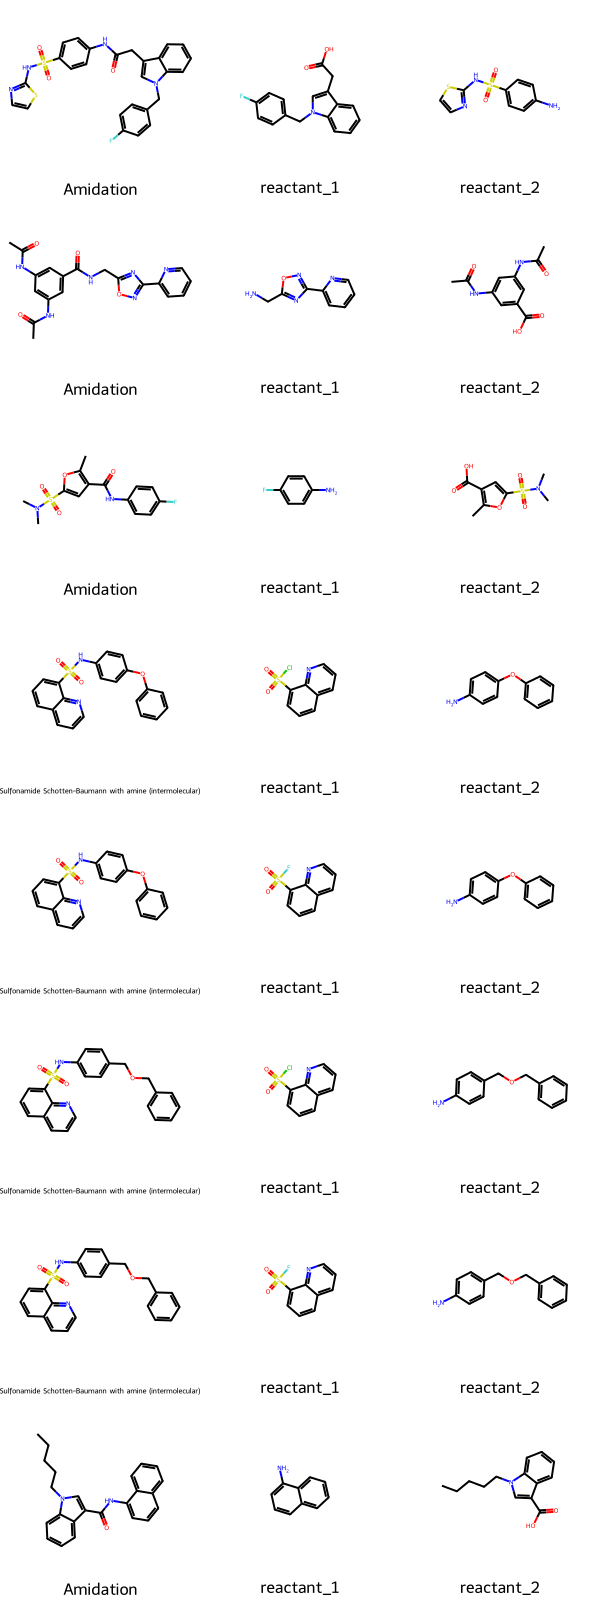

In [57]:
smiles_and_reactants = list()
caption = list()
for i, row in df.iterrows():
    smiles_and_reactants.append(row['SMILES'])
    smiles_and_reactants.append(ast.literal_eval(row['reactants'])[0][0])
    smiles_and_reactants.append(ast.literal_eval(row['reactants'])[0][1])
    caption.append(ast.literal_eval(row['rxn_order_first_to_last'])[0])
    caption.append('reactant_1')
    caption.append('reactant_2')
draw_molecule_grid_with_captions(smiles_and_reactants, caption)

In [58]:
# MANUALLY MADE THOSE ROUTES THAT MANIFOLD CAN TAKE AS INPUT

In [59]:
# RUN this command in terminal:
# python main_v2.py -i /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/D2R-5_1_step_to_elaborate.csv -r /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5 -u

In [60]:
# Running fragmenstein on analouges of first amidation compound. 
# 89 analogs
# fragment inspiration hits = x0592-0B-x0292-2B





In [9]:
# Extract all .mol files from base and fragment placements and put into seperate .sdfs
# D2R-5-elaborated-base-1.positioned.mol
# D2R-5-elaborated-fragment-1.positioned.mol

source_directory = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/to_max/BAZAGILZMWLCGG-UHFFFAOYSA-N-x0592-0B-x0292-2B"  # the root directory from where you start searching
output_file = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-5/to_max/BAZAGILZMWLCGG-UHFFFAOYSA-N-x0592-0B-x0292-2B/frag_combined.sdf"  # name of the output file

def extract_and_concatenate_files(src_dir, output_filename):
    # Use a with statement to open the output file once, and write to it as needed
    with open(output_filename, 'w') as outfile:
        # Walk through each directory and sub-directory
        for root, dirs, files in os.walk(src_dir):
            for file in files:
                # Check if file is a .mol file and also check if it's parent directory matches our criteria
                if file.endswith('.positioned.mol') and any(f"D2R-12-frag-placed-{i}" in root for i in range(1, 50)):
                    file_path = os.path.join(root, file)
                    # Open the .mol file and read its content
                    with open(file_path, 'r') as infile:
                        content = infile.read()
                        # Write the content to the output .sdf file
                        outfile.write(content)
                        # Optionally add some separator if required between individual mol files
                        outfile.write("\n$$$$\n")

extract_and_concatenate_files(source_directory, output_file)


In [7]:
import pickle

with open("../../d2r-12/fragmenstein_placed.pkl", "rb") as file:
    data = pickle.load(file)

print(data)

                                                 smiles  \
0     CC(=O)Nc1cc(NC(C)=O)cc(C(=O)NCc2nc(-c3ccccn3)n...   
1     COc1cccc(OCC(=O)Nc2cc(NC(=O)COc3cccc(OC)c3)cc(...   
2     CC(=O)Nc1c(I)c(NC(C)=O)c(I)c(C(=O)OCCCCCC(=O)N...   
3     C/C=C/C=C/C(=O)Nc1cc(NC(=O)/C=C/C=C/C)cc(C(=O)...   
4     CC(=O)Nc1cc(C(=O)NCc2nc(-c3ccccn3)no2)c(I)c(NC...   
...                                                 ...   
7543  Cc1cccnc1-c1noc(CN(CC2CC2)C(=O)c2cc(NC(=O)CSCc...   
7544  Cc1ccc(OCC(=O)Nc2cc(NC(=O)COc3ccc(C)cc3C)cc(C(...   
7545  Cc1cccnc1-c1noc(CN(CC2CC2)C(=O)c2cc(NC(=O)CCc3...   
7546  Cc1cccc(OCC(=O)Nc2cc(NC(=O)COc3cccc(C)c3)cc(C(...   
7547  Cc1cccnc1-c1noc(CN(CC2CC2)C(=O)c2cc(NC(=O)COc3...   

                         name  \
0                        base   
1        D2R-12-base-placed-1   
2        D2R-12-base-placed-2   
3        D2R-12-base-placed-3   
4        D2R-12-base-placed-4   
...                       ...   
7543  D2R-12-base-placed-7543   
7544  D2R-12-base-placed-75

In [ ]:
# Crashed because of all the mol options from placement. Use only the first placement. 


# D2R-12

In [ ]:
# MANUALLY MADE SHEET THAT IS INPUT

In [ ]:
# RUN this command in terminal:
# python main_v2.py -i /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-12/D2R-12_1_step_to_elaborate.csv -r /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-12 -u

In [ ]:
# Change product dataframe ouput to schema fragmenstein can accept:
name # string
hits # mols, hits are added in fragmenstein placement
smiles # strings

In [ ]:
# Placing compounds with Fragmenstein script
# python fragmenstein_place.py -t (template) -i (hits) -a (analogs) -o (outputfolder)
# python fragmenstein_place.py -t /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/fragmenstein_info/template-x0715.pdb -i /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/fragalysis/NCS1_combined.sdf -a /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-12/Amidation_CC(=O)Nc1cc(NC(C)=O)cc(C(=O)NCc2nc(-c3ccccn3)no2)c1/Amidation_7548_analogs.csv -o /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/warren_yes_green_aug23/D2R-12/placed_7548/

In [8]:
source_directory = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/d2r-12/D2R-12-frag-placed"  # the root directory from where you start searching
output_file = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/d2r-12/D2R-12-frag-placed/frag_combined.sdf"  # name of the output file

extract_and_concatenate_files(source_directory, output_file)